In [6]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from keras.models import Sequential

from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
import os

In [7]:
from imutils import paths


In [9]:
imagePaths = sorted(list(paths.list_images(r"S:\Data for PE2\cell\train")))

random.seed(42)
random.shuffle(imagePaths)

data = []
labels = []
image_dims = (224, 224, 3)

for imagePath in imagePaths:
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (image_dims[1], image_dims[0]))
    image = img_to_array(image)
    data.append(image)
    l = label = imagePath.split(os.path.sep)[-2].split("_")
    labels.append(l)
    
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)
print("{} images ({:.2f}MB)".format(len(imagePaths), data.nbytes / (1024 * 1000.0)))

444 images (522.14MB)


In [10]:
data = np.array(data)
label = np.array(labels)
print(data.shape)

(444, 224, 224, 3)


In [11]:
mlb = MultiLabelBinarizer()
labels = mlb.fit_transform(labels)
# total 4 labels
print("class labels:")
for (i, label) in enumerate(mlb.classes_):
    print("{}. {}".format(i + 1, label))

class labels:
1. Acute erythroid leukaemia
2. Acute lymphoblastic leukaemia
3. Acute megakaryoblastic leukaemia
4. Acute myeloid leukaemia
5. acute promyelocytic leukaemia


In [12]:
def MobileNetV2_model(learning_rate, input_shape,class_number):
    baseModel = MobileNetV2(include_top=False, input_tensor=Input(shape=input_shape))
    for layer in baseModel.layers[:-4]:
        layer.trainable = False
   
    model = Sequential()
    model.add(baseModel)
    model.add(AveragePooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(50, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(class_number, activation='softmax'))

    return model

In [18]:
bs = 32
lr = 0.0001
size = (224, 224)
shape = (224,224, 3) 
epochs = 10
class_number = 5

In [19]:
model = MobileNetV2_model(lr,shape,class_number)
model.compile(loss= "categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

In [20]:
trainX, testX, trainY, testY = train_test_split(data, labels, test_size=0.20)

In [21]:
H = model.fit(trainX, trainY, batch_size=32,steps_per_epoch=len(trainX) // 32,	validation_data=(testX, testY),	validation_steps=len(testX) // 32,	epochs=20)

Epoch 1/20


11/11 [==============================] - 7s 327ms/step - loss: 3.6558 - accuracy: 0.3409 - val_loss: 1.5566 - val_accuracy: 0.4062
Epoch 2/20
11/11 [==============================] - 2s 241ms/step - loss: 3.1513 - accuracy: 0.4025 - val_loss: 1.3268 - val_accuracy: 0.3281
Epoch 3/20
11/11 [==============================] - 2s 225ms/step - loss: 1.7008 - accuracy: 0.5015 - val_loss: 1.3408 - val_accuracy: 0.4375
Epoch 4/20
11/11 [==============================] - 2s 229ms/step - loss: 1.6172 - accuracy: 0.5480 - val_loss: 1.2779 - val_accuracy: 0.5000
Epoch 5/20
11/11 [==============================] - 2s 227ms/step - loss: 1.3522 - accuracy: 0.5201 - val_loss: 1.1688 - val_accuracy: 0.5156
Epoch 6/20
11/11 [==============================] - 2s 226ms/step - loss: 0.9779 - accuracy: 0.6409 - val_loss: 1.0020 - val_accuracy: 0.5312
Epoch 7/20
11/11 [==============================] - 3s 230ms/step - loss: 1.1137 - accuracy: 0.6316 - val_loss: 0.9651 - val_accuracy: 0.5625
Epoc

In [23]:
model.save(r"S:\ce.h5")

C:\Users\S R SURJIT KUMAR\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [32]:
from keras.models import load_model
import tensorflow as tf
model_path = r"S:\ce.h5"
model = load_model(model_path)
img = tf.keras.preprocessing.image.load_img(r"S:\data\cell report\Acute erythroid leukaemia\download (2).jpg", target_size=(224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.array([img_array]) 
predictions = model.predict(img_array)
print(predictions)

1/1 [==============================] - 1s 641ms/step
[[0.07969037 0.6886336  0.0296463  0.14474075 0.057289  ]]


In [33]:
import os
class_names=[]
directory_path =r"S:\Data for PE2\cell\train"
file_names = os.listdir(directory_path)
for file_name in file_names:
    class_names.append(file_name)
    print(file_name)

Acute erythroid leukaemia
Acute lymphoblastic leukaemia
Acute megakaryoblastic leukaemia
Acute myeloid leukaemia
acute promyelocytic leukaemia


In [34]:
class_id = np.argmax(predictions, axis = 1)
print(class_id)
class_names[class_id.item()]

[1]


'Acute lymphoblastic leukaemia'

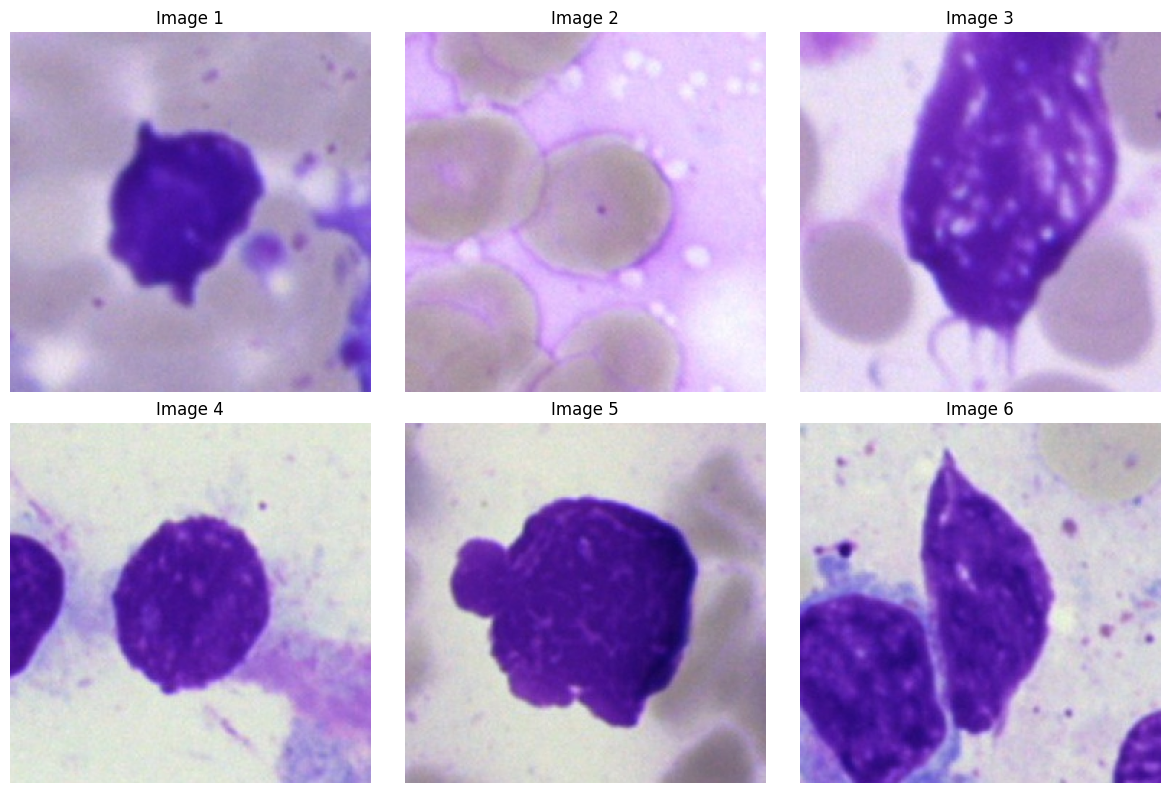

In [2]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to the directory containing your images
directory_path = r"S:\Adacamic Projects\data\cell report\Bone Marrow\Train\ART"

# Get a list of all image filenames in the directory
image_files = os.listdir(directory_path)

# Randomly select 6 images
selected_images = random.sample(image_files, 6)

# Create a subplot with 2 rows and 3 columns
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Plot each selected image on its corresponding subplot
for i, image_file in enumerate(selected_images):
    row = i // 3
    col = i % 3
    img = mpimg.imread(os.path.join(directory_path, image_file))
    axes[row, col].imshow(img)
    axes[row, col].set_title(f'Image {i+1}')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()


In [6]:
pip install transformers

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
